In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from drift_ml.datasets.bosch_cnc_machining.utils.utils import augment_xyz_samples
from drift_ml.datasets.bosch_cnc_machining.utils.dataloader import RawBoschCNCDataloader, STFTBoschCNCDataloader, NPYBoschCNCDataLoader

In [3]:
# loader = RawBoschCNCDataloader(
#     metadata_path="/home/nicolasj92/projects/drift_ml/src/drift_ml/datasets/bosch_cnc_machining/extracted_features/metadata_ws4096.pkl" 
# )
# loader.load_raw_h5_data(raw_h5_data_path="/home/nicolasj92/projects/drift_ml/src/drift_ml/datasets/bosch_cnc_machining/raw_data/data")
# loader.save_windowed_samples_as_npy(sample_data_folder_path="/home/nicolasj92/projects/drift_ml/src/drift_ml/datasets/bosch_cnc_machining/extracted_features/npy")
# loader.save_windowed_samples_as_stft(
#     filename="/home/nicolasj92/projects/drift_ml/src/drift_ml/datasets/bosch_cnc_machining/extracted_features/stft/stft_test_4096.h5"
# )

In [4]:
loader = NPYBoschCNCDataLoader(metadata_path="/home/nicolasj92/projects/drift_ml/src/drift_ml/datasets/bosch_cnc_machining/extracted_features/metadata_ws4096.pkl")
loader.load_data(
    sample_data_x_path="/home/nicolasj92/projects/drift_ml/src/drift_ml/datasets/bosch_cnc_machining/extracted_features/npy/sample_data_x_raw_ws4096.npy",
    sample_data_y_path="/home/nicolasj92/projects/drift_ml/src/drift_ml/datasets/bosch_cnc_machining/extracted_features/npy/sample_data_y_raw_ws4096.npy"
    )

In [7]:
stft_loader = loader.get_windowed_samples_as_stft_dataloader(transform_fn=lambda x: augment_xyz_samples(x, yaw_deg=10))

  0%|          | 0/42978 [00:00<?, ?it/s]

(42978, 3, 129, 33)


In [3]:
stft_loader = STFTBoschCNCDataloader(
    metadata_path="/home/nicolasj92/projects/drift_ml/src/drift_ml/datasets/bosch_cnc_machining/extracted_features/metadata_ws4096.pkl"
    )
stft_loader.load_data(
    data_h5_path="/home/nicolasj92/projects/drift_ml/src/drift_ml/datasets/bosch_cnc_machining/extracted_features/stft/stft_4096.h5"
    )

In [4]:
stft_loader.generate_datasets_by_size(train_size=.5,val_size=.1,test_size=.4, processes=["OP07"])

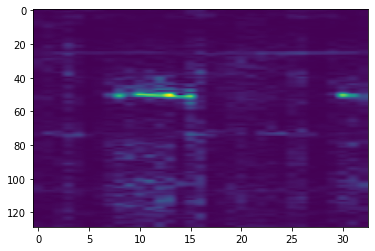

In [6]:
plt.imshow(stft_loader.X_train[100, 1], aspect="auto")

In [7]:
channel_means = np.mean(stft_loader.X_train, axis=(0, 2, 3), keepdims=True)
channel_stds = np.std(stft_loader.X_train, axis=(0, 2, 3), keepdims=True)

X_train_scaled = (stft_loader.X_train - channel_means) / channel_stds
X_val_scaled = (stft_loader.X_val - channel_means) / channel_stds
X_test_scaled = (stft_loader.X_test - channel_means) / channel_stds

In [9]:
import torch
from drift_ml.datasets.bosch_cnc_machining.models.nnclassifier import NNClassifier
from drift_ml.datasets.bosch_cnc_machining.models.lenet import LeNet

torch.manual_seed(1)
np.random.seed(0)

model = NNClassifier(model=LeNet)
model.fit(
    X_train_scaled, 
    stft_loader.y_train[:, np.newaxis], 
    X_val_scaled, 
    stft_loader.y_val[:, np.newaxis], 
    lrate=1e-1
)
# model.fit(X_train_scaled, y_train, X_val_scaled, y_val)

DEBUG:root:Starting training with batch size 64, lrate 0.1, epochs 100
DEBUG:root:Epoch 0, Val. AUROC 1.00, AURPC 1.00, F1 0.30
DEBUG:root:Epoch 1, Val. AUROC 1.00, AURPC 1.00, F1 0.90
DEBUG:root:Epoch 2, Val. AUROC 1.00, AURPC 1.00, F1 0.69
DEBUG:root:Epoch 3, Val. AUROC 1.00, AURPC 1.00, F1 0.82
DEBUG:root:Epoch 4, Val. AUROC 1.00, AURPC 1.00, F1 0.90
DEBUG:root:Epoch 5, Val. AUROC 1.00, AURPC 1.00, F1 0.78
DEBUG:root:Epoch 6, Val. AUROC 1.00, AURPC 1.00, F1 0.90
DEBUG:root:Epoch 7, Val. AUROC 1.00, AURPC 1.00, F1 0.90
DEBUG:root:Epoch 8, Val. AUROC 1.00, AURPC 1.00, F1 0.90
DEBUG:root:Epoch 9, Val. AUROC 1.00, AURPC 1.00, F1 0.90
DEBUG:root:Epoch 10, Val. AUROC 1.00, AURPC 1.00, F1 0.95
DEBUG:root:Epoch 11, Val. AUROC 1.00, AURPC 1.00, F1 0.90
DEBUG:root:Epoch 12, Val. AUROC 1.00, AURPC 1.00, F1 0.86
DEBUG:root:Epoch 13, Val. AUROC 1.00, AURPC 1.00, F1 0.90
DEBUG:root:Epoch 14, Val. AUROC 1.00, AURPC 1.00, F1 0.90
DEBUG:root:Epoch 15, Val. AUROC 1.00, AURPC 1.00, F1 0.90
DEBUG:root:

KeyboardInterrupt: 